环境配置见environment.txt

如果第一个cell运行之后，报了ModuleNotFoundError，检查右上角的ipykernel是否和左下角环境配置中的环境一致。e.g.左下角环境是ja_nlp_python37，则右上角的的ipykernel需要是该环境下的ipykernel

In [1]:
import sys
sys.path.insert(0, 'c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\app')
 
import utils as U
import text_mining_preprocess_0712

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhouy217\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.375 seconds.
Prefix dict has been built successfully.
[nltk_data] Error loading wordnet: [WinError 10060] A connection
[nltk_data]     attempt failed because the connected party did not
[nltk_data]     properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond
[nltk_data] Error loading omw-1.4: [WinError 10060] A connection
[nltk_data]     attempt failed because the connected party did not
[nltk_data]     properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond


In [2]:
# from text_mining_preprocess_0705 import read_file_as_dataframe
ja_df=text_mining_preprocess_0712.read_file_as_dataframe("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\data\\ja_slide9_data.xlsx",col_list=[15],name_list=['sentence'],file_header=0)
ja_df.head(3)

,sentence
0,もっとベタニスベオーバを学ぶ
1,特になし
2,他剤理解しTOV継続訴求


In [3]:
language_outcome=text_mining_preprocess_0712.TextMiningPreprocess(ja_df).language_detection()
language_outcome

'ja'

In [4]:
# from text_mining_preprocess_0705 import TextMiningPreprocess
ja_text_mining=text_mining_preprocess_0712.TextMiningPreprocess(ja_df)
ja_SentenceList=ja_text_mining.create_SentenceList()
ja_SentenceList[0:5]

['もっとベタニスベオーバを学ぶ',
 '特になし',
 '他剤理解しTOV継続訴求',
 '不安は無いです',
 'インサイトの深堀が重要であることは着任時から重要と思い指導している。しかし、現場で出来ているかと言えば、出来ていないMRもいる。\n今回のFFTでインサイトの深堀が重要だというのはMRに伝わったと感じる。しかし、これが現場で使うにはもっとトレーニングが必要であると感じている']

In [6]:
ja_SentenceList=ja_text_mining.create_SentenceList()
ja_WordList_in_SentenceList=ja_text_mining.japanese_text_cleaning(if_pos_screen='yes')
#加入了一个if_pos_screen参数，之前一版preprocess是选取所有词性的单词，做出来之后发现和日本项目的结果差距很大，
#原因是里面非常多的助词，无实际意义的虚词，导致词频最大为100，
#词频条形图前20都是没有意义的虚词助词，且共现词网络的节点面积异常大
#考虑到日文没有停用词表，因此用这个参数作筛选，选出名词动词形容词（实词），再做后续的分析
#如果需要保留所有词性，令if_pos_screen=‘no’即可

In [7]:
ja_WordList_in_SentenceList[1:4]

[['なし'], ['理解', '継続', '訴求'], ['不安', '無い']]

In [8]:
ja_word_list = ja_text_mining.flatten_list()
ja_concat_sentence_text = ja_text_mining.concat_sentence()
# ja_word_list
# ja_concat_sentence_text

#### japanese text statistical analysis

In [9]:
from text_mining_statistics import Statictics
ja_statistics=Statictics(ja_df)
ja_one_word_cnt_dict,ja_one_word_cnt_df=ja_statistics.one_word_freq(ja_WordList_in_SentenceList)
# ja_one_word_cnt_dict

In [10]:
ja_cnt_sorted_dict = U.sort_dict_by_value(ja_one_word_cnt_dict)

In [11]:
ja_part_of_speech_df = ja_statistics.part_of_speech_dataframe('ja',ja_word_list)
ja_part_of_speech_df.head(5)
#*是词性unknown的词语

,part of speech,count
0,副詞,44
1,一般,606
2,*,3289
3,名詞,720
4,助詞,493


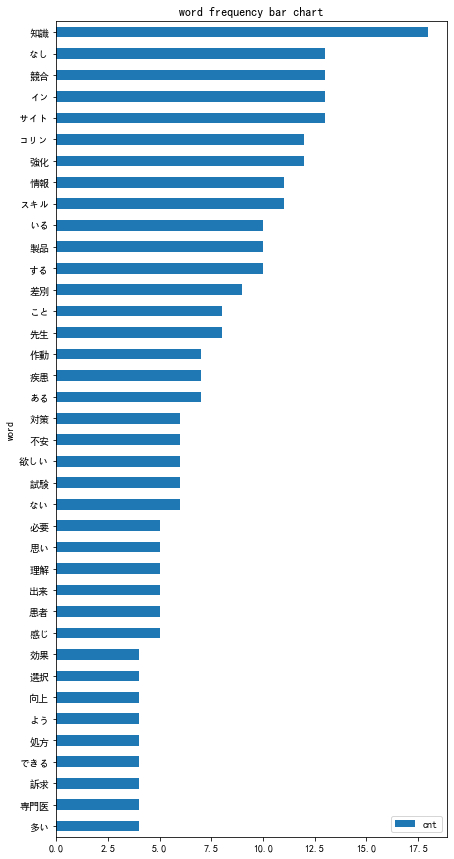

In [15]:
ja_statistics.barh_plot(ja_one_word_cnt_df,col_name='cnt',word_cnt=3)
#word_cnt是选出词频大于word_cnt的词语展示在图中，如果没有这个条件，所有词语在图中放不下且会有warnings
#后面共现词网络中的word_cnt参数同此处

In [16]:
#permutation是无间隔的组合，e.g.“今天 天气 很好” 组合为 “今天天气”“今天很好”“天气很好”
#bigram是两词组合（word pairs), 可以允许有间隔，只要词语组合共现出现，就会被count，用nltk.bigram()函数实现的

In [17]:
ja_unit2_permutation = ja_statistics.unit2_permutation(ja_word_list)

In [18]:
ja_unit2_dictionary = ja_statistics.unit2_dictionary(ja_concat_sentence_text)

In [19]:
ja_two_word_permutation_freq=ja_statistics.two_word_permutation_freq(ja_unit2_dictionary)
ja_two_word_permutation_freq

,two_word,two_word_freq
0,インサイト,13
1,製品知識,5
2,患者さん,3
3,いる先生,2
4,すること,2
...,...,...
133,合意形成,1
134,とらえるフレ,1
135,供給案内,1
136,届け切れ,1


In [20]:
ja_bigram_df=ja_statistics.create_bigram_df(ja_word_list)
ja_bigram_df.head(6)

,bigram,count
0,"(イン, サイト)",13
1,"(競合, 情報)",7
2,"(製品, 知識)",6
3,"(サイト, 深堀)",3
4,"(患者, さん)",3
5,"(疾患, 知識)",3


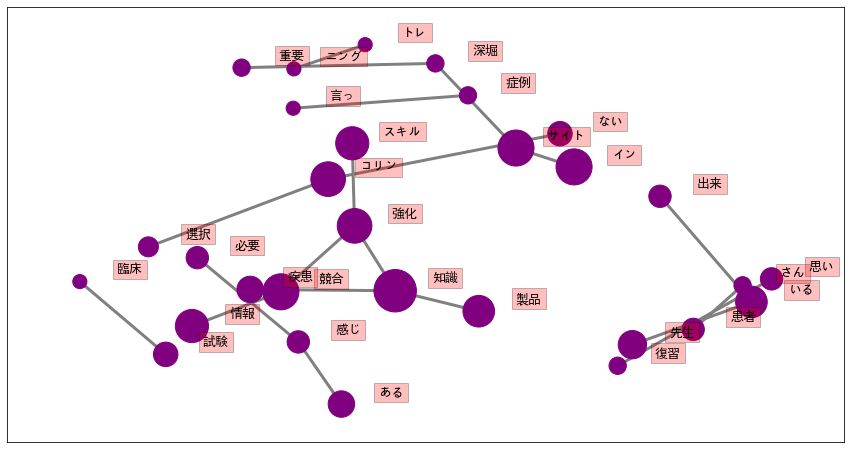

In [21]:
ja_statistics.cooccurrence_network(ja_word_list)

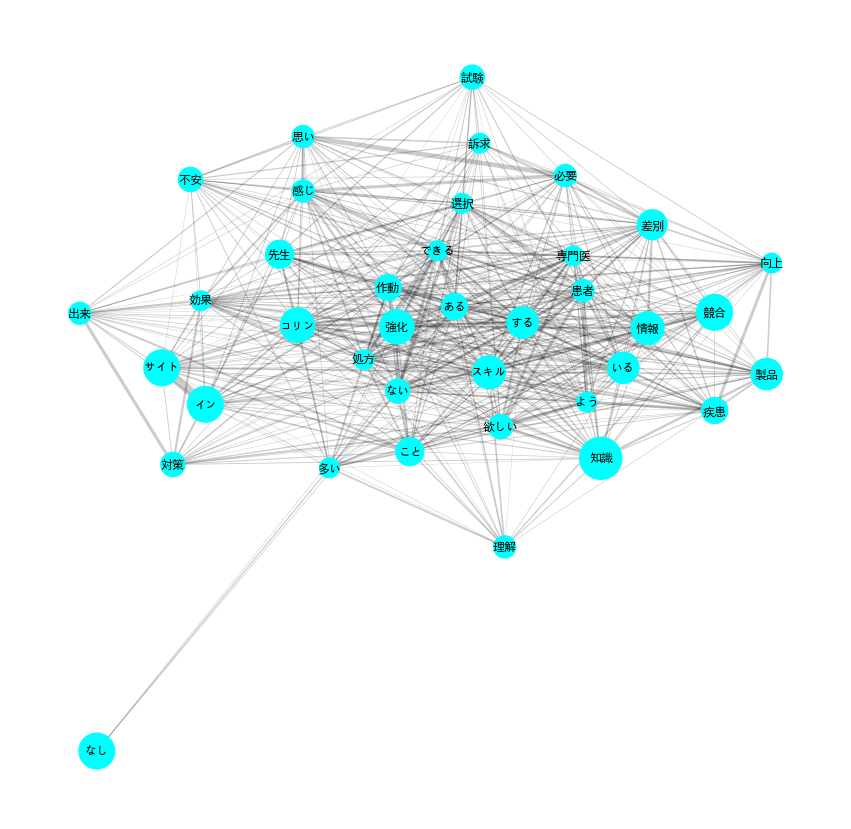

In [24]:
ja_statistics.create_word_network(ja_WordList_in_SentenceList,cnt=3)


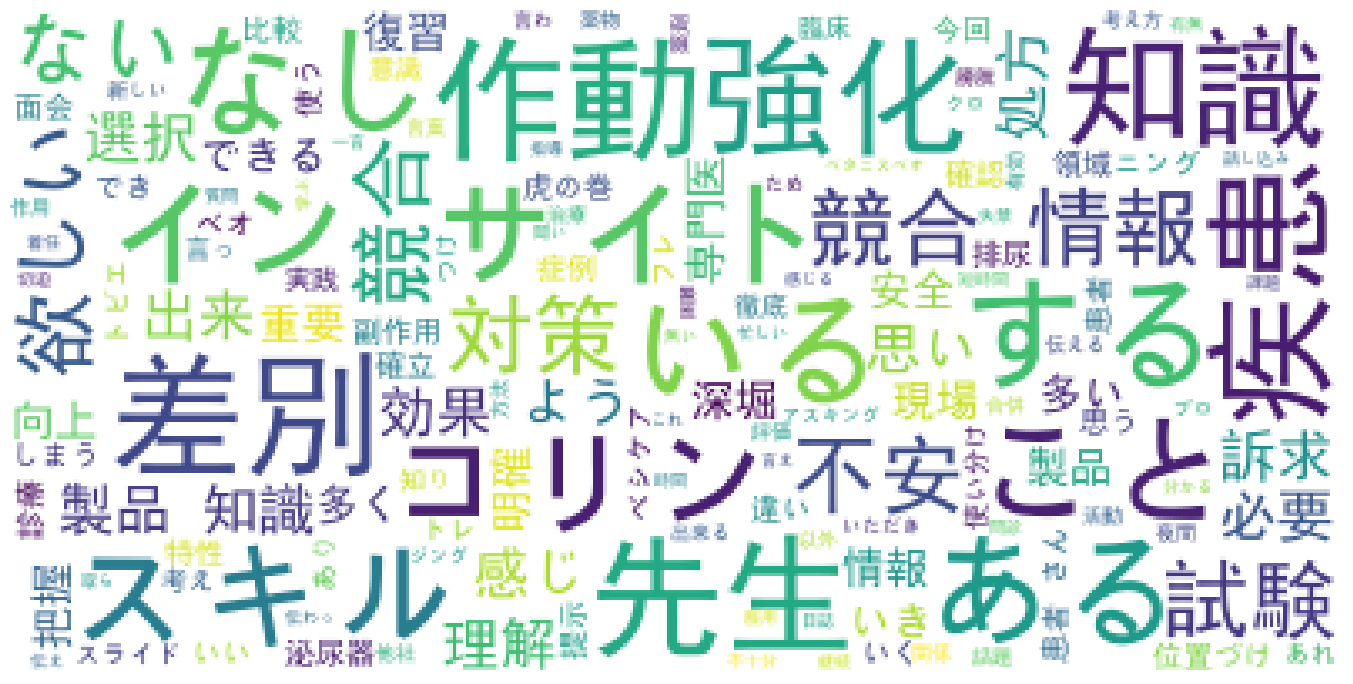

In [23]:
ja_statistics.word_cloud(ja_word_list,ifmask='no')

In [25]:
from text_mining_model import lda_model

In [26]:
lda_model(ja_word_list,result_save_name='c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\notebook\\ja_lda_result.html',num_topics=4,passes=60,num_words=10)

0:
  "知識" (0.065)
  "サイト" ( 0.047)
  "コリン" ( 0.044)
  "する" ( 0.037)
  "差別" ( 0.033)
  "こと" ( 0.029)
  "欲しい" ( 0.022)
  "必要" ( 0.019)
  "患者" ( 0.019)
  "処方"( 0.015)
1:
  "情報" (0.048)
  "製品" ( 0.044)
  "ある" ( 0.031)
  "多い" ( 0.018)
  "よう" ( 0.018)
  "訴求" ( 0.018)
  "確認" ( 0.014)
  "思う" ( 0.014)
  "明確" ( 0.014)
  "復習"( 0.014)
2:
  "イン" (0.045)
  "なし" ( 0.045)
  "競合" ( 0.045)
  "強化" ( 0.041)
  "スキル" ( 0.038)
  "いる" ( 0.035)
  "先生" ( 0.028)
  "作動" ( 0.024)
  "疾患" ( 0.024)
  "不安"( 0.021)
3:
  "ない" (0.026)
  "出来" ( 0.022)
  "感じ" ( 0.022)
  "思い" ( 0.022)
  "理解" ( 0.022)
  "選択" ( 0.018)
  "専門医" ( 0.018)
  "できる" ( 0.018)
  "向上" ( 0.018)
  "特性"( 0.013)

Perplexity:  -6.656420568489698
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
